# Exercise: Clustering Algorithms with Scikit Learn
<img src="https://github.com/dav-92/DataScienceSS20/blob/master/Notebooks/IMG/sk-logo.png?raw=1" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [0]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [0]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

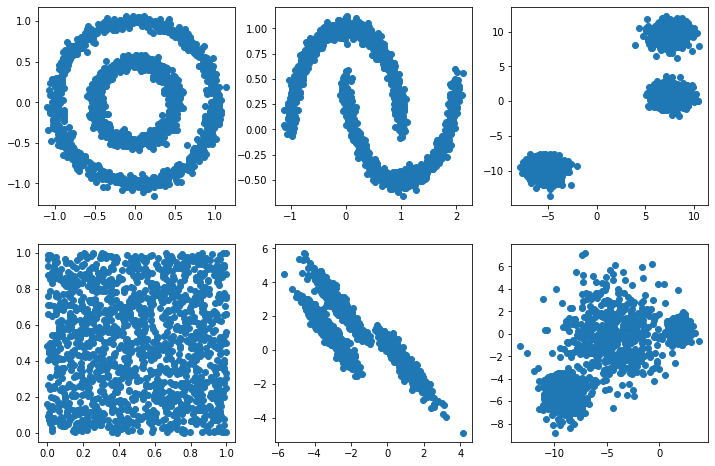

In [3]:
fig = plt.figure(figsize=(12,8))
axes = fig.add_subplot(2,3,1)
axes.scatter(A[:, 0], A[:, 1])
axes = fig.add_subplot(2,3,2)
axes.scatter(B[:, 0], B[:, 1])
axes = fig.add_subplot(2,3,3)
axes.scatter(C[:, 0], C[:, 1])
axes = fig.add_subplot(2,3,4)
axes.scatter(D[:, 0], D[:, 1])
axes = fig.add_subplot(2,3,5)
axes.scatter(E[:, 0], E[:, 1])
axes = fig.add_subplot(2,3,6)
axes.scatter(F[:, 0], F[:, 1])

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

In [0]:
from sklearn.cluster import KMeans

kMeansA = KMeans(n_clusters=2, init='k-means++').fit(A)
kMeansB = KMeans(n_clusters=2, init='k-means++').fit(B)
kMeansC = KMeans(n_clusters=3, init='k-means++').fit(C)
kMeansD = KMeans(n_clusters=1, init='k-means++').fit(D) #no/one clusters
kMeansE = KMeans(n_clusters=3, init='k-means++').fit(E)
kMeansF = KMeans(n_clusters=3, init='k-means++').fit(F)

In [37]:
kMeansA.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [38]:
kMeansA.cluster_centers_

array([[ 0.08908894, -0.46417464],
       [-0.0920595 ,  0.4779768 ]])

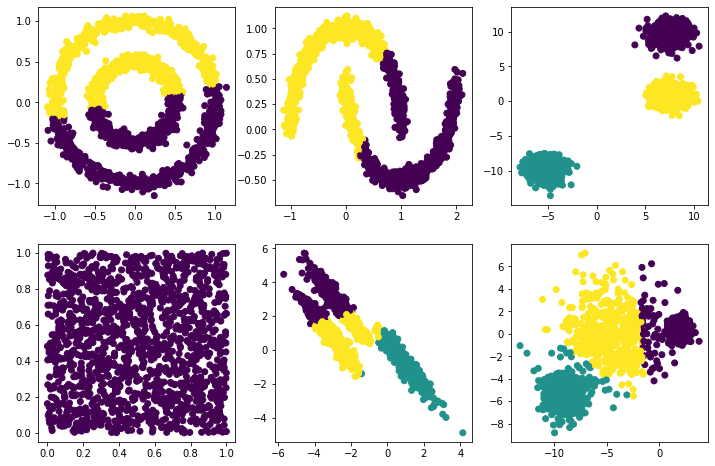

In [39]:
fig = plt.figure(figsize=(12,8))
axes = fig.add_subplot(2,3,1)
axes.scatter(A[:, 0], A[:, 1], c = kMeansA.labels_)
axes = fig.add_subplot(2,3,2)
axes.scatter(B[:, 0], B[:, 1], c = kMeansB.labels_)
axes = fig.add_subplot(2,3,3)
axes.scatter(C[:, 0], C[:, 1], c = kMeansC.labels_)
axes = fig.add_subplot(2,3,4)
axes.scatter(D[:, 0], D[:, 1], c = kMeansD.labels_)
axes = fig.add_subplot(2,3,5)
axes.scatter(E[:, 0], E[:, 1], c = kMeansE.labels_)
axes = fig.add_subplot(2,3,6)
axes.scatter(F[:, 0], F[:, 1], c = kMeansF.labels_)

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

In [0]:
from sklearn.cluster import DBSCAN

DBSCAN_A = DBSCAN(eps=0.2, min_samples=2).fit(A)
DBSCAN_B = DBSCAN(eps=0.2, min_samples=2).fit(B)
DBSCAN_C = DBSCAN(eps=2, min_samples=2).fit(C)
DBSCAN_D = DBSCAN(eps=0.2, min_samples=2).fit(D)
DBSCAN_E = DBSCAN(eps=0.4, min_samples=20).fit(E)
DBSCAN_F = DBSCAN(eps=1.1, min_samples=20).fit(F)

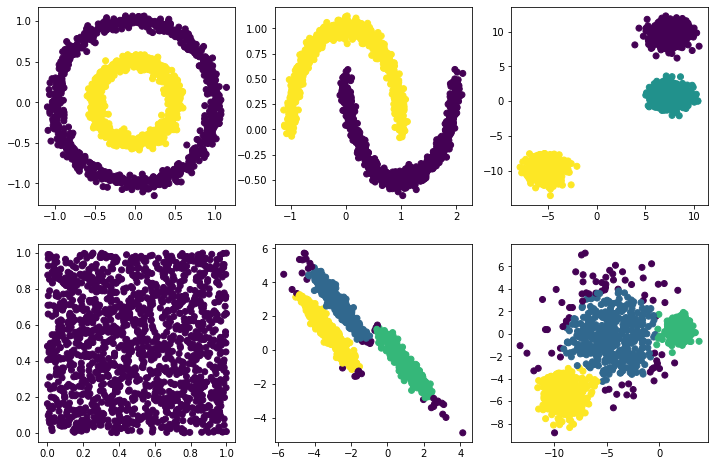

In [125]:
fig = plt.figure(figsize=(12,8))
axes = fig.add_subplot(2,3,1)
axes.scatter(A[:, 0], A[:, 1], c = DBSCAN_A.labels_)
axes = fig.add_subplot(2,3,2)
axes.scatter(B[:, 0], B[:, 1], c = DBSCAN_B.labels_)
axes = fig.add_subplot(2,3,3)
axes.scatter(C[:, 0], C[:, 1], c = DBSCAN_C.labels_)
axes = fig.add_subplot(2,3,4)
axes.scatter(D[:, 0], D[:, 1], c = DBSCAN_D.labels_)
axes = fig.add_subplot(2,3,5)
axes.scatter(E[:, 0], E[:, 1], c = DBSCAN_E.labels_)
axes = fig.add_subplot(2,3,6)
axes.scatter(F[:, 0], F[:, 1], c = DBSCAN_F.labels_)